In [1]:
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_dataset(file_path):
    return pd.read_csv(file_path)

os.chdir('/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings')

os.getcwd()

'/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings'

In [7]:
latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/latest_match_data_july_21_superstar_info_recalculated_columns_added.csv')
latest_match_data = latest_match_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
#pd.set_option('display.max_columns', None)


## Task 1: simple ∆MV / ∆Rank bar chart

### ∆MV

In [64]:
import pandas as pd
import numpy as np

# Assuming latest_match_data is already loaded
# Define the number of initial bins
num_bins = 12

# Create initial bins between the min and max of Market.Value.Difference
initial_bins = np.linspace(latest_match_data['Market.Value.Difference'].min(), latest_match_data['Market.Value.Difference'].max(), num_bins + 1)

# Define the specific intervals to subdivide
specific_intervals = [
    (-1033250.0002, 0),
    (0, 1033250.0002),
    (1033250.0002, 5033250.0002),
    (5033250.0002, 10033250.0002),
    (10033250.0002, 25725333.3332)
]

# Create additional bins within the specific intervals
sub_bins = np.concatenate([np.linspace(start, end, 2) for start, end in specific_intervals])

# Combine the bins and remove duplicates
combined_bins = np.unique(np.concatenate((initial_bins, sub_bins)))

# Remove the bin with zero rows
combined_bins = combined_bins[combined_bins != -54550416.667]

# Assign each row to a bin
latest_match_data['MV_Bin'] = pd.cut(latest_match_data['Market.Value.Difference'], combined_bins)

# Calculate the number of rows and the sum of MV_Prediction_Correct and MV_Prediction_Correct_inverse for each bin
bin_summary = latest_match_data.groupby('MV_Bin').apply(
    lambda x: pd.Series({
        'Number_of_Rows': len(x),
        'Sum_MV_Prediction_Correct': x['MV_Prediction_Correct'].sum(),
        'Sum_MV_Prediction_Correct_inverse': x['MV_Prediction_Correct_inverse'].sum()
    })
).reset_index()

# Calculate percentages
bin_summary['Percentage_MV_Prediction_Correct'] = bin_summary['Sum_MV_Prediction_Correct'] / bin_summary['Number_of_Rows']
bin_summary['Percentage_MV_Prediction_Correct_inverse'] = bin_summary['Sum_MV_Prediction_Correct_inverse'] / bin_summary['Number_of_Rows']

# Calculate 1 minus the percentages and combine into a single column
bin_summary['1_minus_Percentage'] = 1 - bin_summary['Percentage_MV_Prediction_Correct'] - bin_summary['Percentage_MV_Prediction_Correct_inverse']

# Display the table
bin_summary

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32510/3425074016.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = latest_match_data.groupby('MV_Bin').apply(


,MV_Bin,Number_of_Rows,Sum_MV_Prediction_Correct,Sum_MV_Prediction_Correct_inverse,Percentage_MV_Prediction_Correct,Percentage_MV_Prediction_Correct_inverse,1_minus_Percentage
0,"(-723515000.0, -589722083.333]",8,5,1,0.625000,0.125000,0.250000
1,"(-589722083.333, -455929166.667]",38,33,2,0.868421,0.052632,0.078947
2,"(-455929166.667, -322136250.0]",87,63,10,0.724138,0.114943,0.160920
3,"(-322136250.0, -188343333.333]",167,108,27,0.646707,0.161677,0.191617
4,"(-188343333.333, -54550416.667]",655,395,111,0.603053,0.169466,0.227481
5,"(-54550416.667, -1033250.0]",1382,658,349,0.476122,0.252533,0.271346
6,"(-1033250.0, 0.0]",241,91,87,0.377593,0.360996,0.261411
7,"(0.0, 1033250.0]",223,131,40,0.587444,0.179372,0.233184
8,"(1033250.0, 5033250.0]",326,219,40,0.671779,0.122699,0.205521
9,"(5033250.0, 10033250.0]",251,166,37,0.661355,0.147410,0.191235


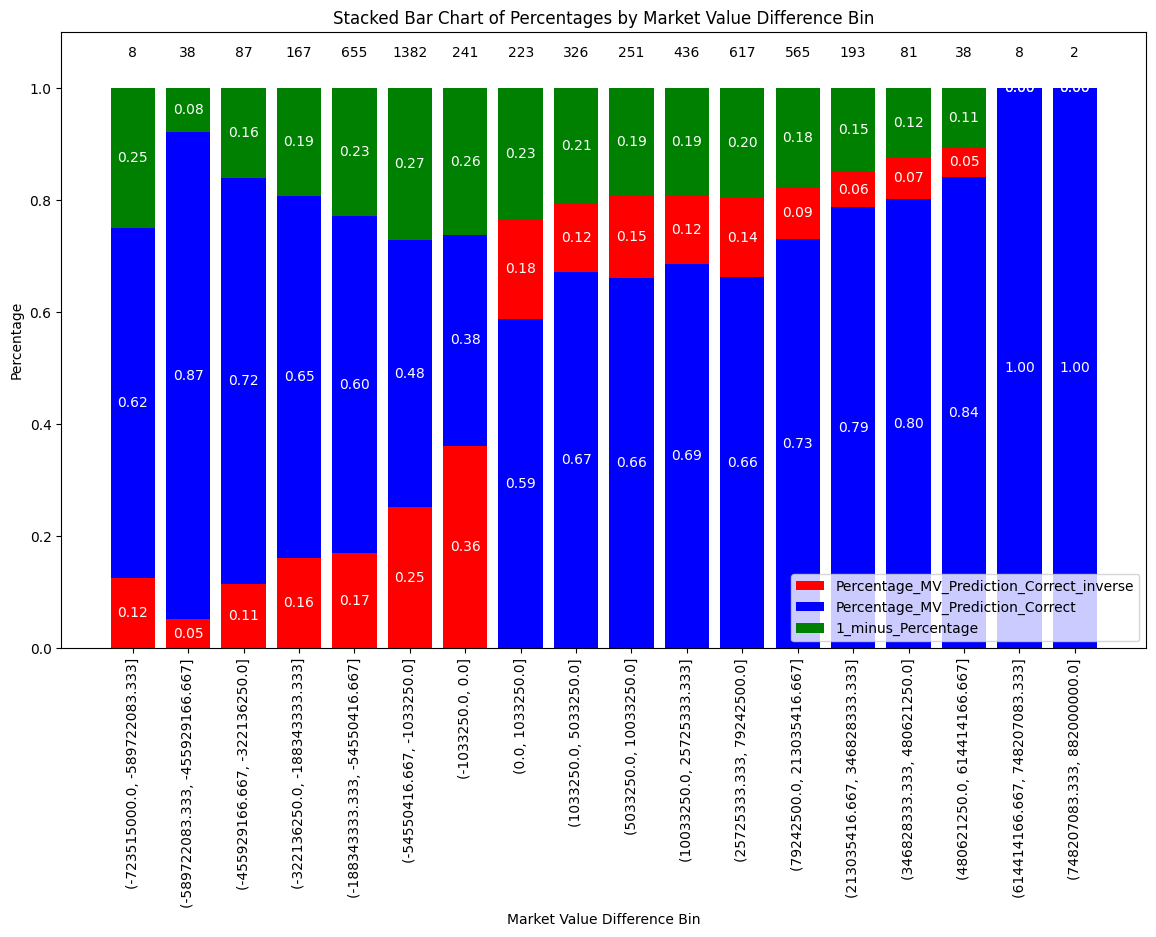

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages
bin_summary['Percentage_MV_Prediction_Correct'] = bin_summary['Sum_MV_Prediction_Correct'] / bin_summary['Number_of_Rows']
bin_summary['Percentage_MV_Prediction_Correct_inverse'] = bin_summary['Sum_MV_Prediction_Correct_inverse'] / bin_summary['Number_of_Rows']

# Calculate 1 minus both percentages and combine into a single column
bin_summary['1_minus_Percentage'] = 1 - (bin_summary['Percentage_MV_Prediction_Correct'] + bin_summary['Percentage_MV_Prediction_Correct_inverse'])

# Plot the results
plt.figure(figsize=(14, 8))

# Define the positions and width for the bars
bar_width = 0.8
positions = np.arange(len(bin_summary))

# Plot the stacked bars with different orders based on the interval upper bound
for index, row in bin_summary.iterrows():
    if row['MV_Bin'].right <= 0:
        # Order: red, blue, green
        bar1 = plt.bar(index, row['Percentage_MV_Prediction_Correct_inverse'], bar_width, label='Percentage_MV_Prediction_Correct_inverse' if index == 0 else "", color='r')
        bar2 = plt.bar(index, row['Percentage_MV_Prediction_Correct'], bar_width, bottom=row['Percentage_MV_Prediction_Correct_inverse'], label='Percentage_MV_Prediction_Correct' if index == 0 else "", color='b')
        bar3 = plt.bar(index, row['1_minus_Percentage'], bar_width, bottom=row['Percentage_MV_Prediction_Correct'] + row['Percentage_MV_Prediction_Correct_inverse'], label='1_minus_Percentage' if index == 0 else "", color='g')
    else:
        # Order: blue, red, green
        bar1 = plt.bar(index, row['Percentage_MV_Prediction_Correct'], bar_width, label='Percentage_MV_Prediction_Correct' if index == 0 else "", color='b')
        bar2 = plt.bar(index, row['Percentage_MV_Prediction_Correct_inverse'], bar_width, bottom=row['Percentage_MV_Prediction_Correct'], label='Percentage_MV_Prediction_Correct_inverse' if index == 0 else "", color='r')
        bar3 = plt.bar(index, row['1_minus_Percentage'], bar_width, bottom=row['Percentage_MV_Prediction_Correct'] + row['Percentage_MV_Prediction_Correct_inverse'], label='1_minus_Percentage' if index == 0 else "", color='g')

# Add labels, title, and legend
plt.xlabel('Market Value Difference Bin')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Percentages by Market Value Difference Bin')
plt.xticks(positions, bin_summary['MV_Bin'].astype(str), rotation=90)
plt.legend(loc='lower right')

# Increase whitespace at the top
plt.ylim(0, 1.1)

# Annotate the bars with the number of rows and percentages
for index, row in bin_summary.iterrows():
    plt.text(index, 1.05, f'{int(row["Number_of_Rows"])}', ha='center', va='bottom')
    if row['MV_Bin'].right <= 0:
        plt.text(index, row['Percentage_MV_Prediction_Correct_inverse'] / 2, f'{row["Percentage_MV_Prediction_Correct_inverse"]:.2f}', ha='center', va='center', color='white')
        plt.text(index, row['Percentage_MV_Prediction_Correct_inverse'] + row['Percentage_MV_Prediction_Correct'] / 2, f'{row["Percentage_MV_Prediction_Correct"]:.2f}', ha='center', va='center', color='white')
        plt.text(index, row['Percentage_MV_Prediction_Correct_inverse'] + row['Percentage_MV_Prediction_Correct'] + row['1_minus_Percentage'] / 2, f'{row["1_minus_Percentage"]:.2f}', ha='center', va='center', color='white')
    else:
        plt.text(index, row['Percentage_MV_Prediction_Correct'] / 2, f'{row["Percentage_MV_Prediction_Correct"]:.2f}', ha='center', va='center', color='white')
        plt.text(index, row['Percentage_MV_Prediction_Correct'] + row['Percentage_MV_Prediction_Correct_inverse'] / 2, f'{row["Percentage_MV_Prediction_Correct_inverse"]:.2f}', ha='center', va='center', color='white')
        plt.text(index, row['Percentage_MV_Prediction_Correct'] + row['Percentage_MV_Prediction_Correct_inverse'] + row['1_minus_Percentage'] / 2, f'{row["1_minus_Percentage"]:.2f}', ha='center', va='center', color='white')

plt.show()

### ∆Rank

In [67]:
# Assuming latest_match_data is already loaded
# Define the number of initial bins
num_bins = 12

# Create initial bins between the min and max of Rank.Difference
initial_bins = np.linspace(latest_match_data['Rank.Difference'].min(), latest_match_data['Rank.Difference'].max(), num_bins + 1)

# Define the specific intervals to subdivide
specific_intervals = [
    (-34.17, -25),
    (-15, -10),
    (-10, -5),
    (-5, 0),
    (0, 5),
    (5, 10),
    (10, 15),
    (15, 25),
    (25, 34.17)
]

# Create additional bins within the specific intervals
sub_bins = np.concatenate([np.linspace(start, end, 2) for start, end in specific_intervals])

# Combine the bins and remove duplicates
combined_bins = np.unique(np.concatenate((initial_bins, sub_bins)))

# Assign each row to a bin
latest_match_data['Rank_Bin'] = pd.cut(latest_match_data['Rank.Difference'], combined_bins)

# Calculate the number of rows and the sum of Rank_Prediction_Correct and Rank_Prediction_Correct_inverse for each bin
bin_summary = latest_match_data.groupby('Rank_Bin').apply(
    lambda x: pd.Series({
        'Number_of_Rows': len(x),
        'Sum_Rank_Prediction_Correct': x['rank_prediction_correct'].sum(),
        'Sum_Rank_Prediction_Correct_inverse': x['Rank_Prediction_Correct_inverse'].sum()
    })
).reset_index()

# Calculate percentages
bin_summary['Percentage_Rank_Prediction_Correct'] = bin_summary['Sum_Rank_Prediction_Correct'] / bin_summary['Number_of_Rows']
bin_summary['Percentage_Rank_Prediction_Correct_inverse'] = bin_summary['Sum_Rank_Prediction_Correct_inverse'] / bin_summary['Number_of_Rows']

# Calculate 1 minus the percentages and combine into a single column
bin_summary['1_minus_Percentage'] = 1 - bin_summary['Percentage_Rank_Prediction_Correct'] - bin_summary['Percentage_Rank_Prediction_Correct_inverse']

# Display the table
bin_summary

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32510/631901308.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = latest_match_data.groupby('Rank_Bin').apply(


,Rank_Bin,Number_of_Rows,Sum_Rank_Prediction_Correct,Sum_Rank_Prediction_Correct_inverse,Percentage_Rank_Prediction_Correct,Percentage_Rank_Prediction_Correct_inverse,1_minus_Percentage
0,"(-210.0, -175.083]",22,22,0,1.000000,0.000000,0.000000
1,"(-175.083, -140.167]",69,66,2,0.956522,0.028986,0.014493
2,"(-140.167, -105.25]",174,139,11,0.798851,0.063218,0.137931
3,"(-105.25, -70.333]",383,258,49,0.673629,0.127937,0.198433
4,"(-70.333, -35.417]",771,409,165,0.530480,0.214008,0.255512
5,"(-35.417, -34.17]",30,10,8,0.333333,0.266667,0.400000
6,"(-34.17, -25.0]",287,126,90,0.439024,0.313589,0.247387
7,"(-25.0, -15.0]",352,134,125,0.380682,0.355114,0.264205
8,"(-15.0, -10.0]",197,83,59,0.421320,0.299492,0.279188
9,"(-10.0, -5.0]",177,51,78,0.288136,0.440678,0.271186


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


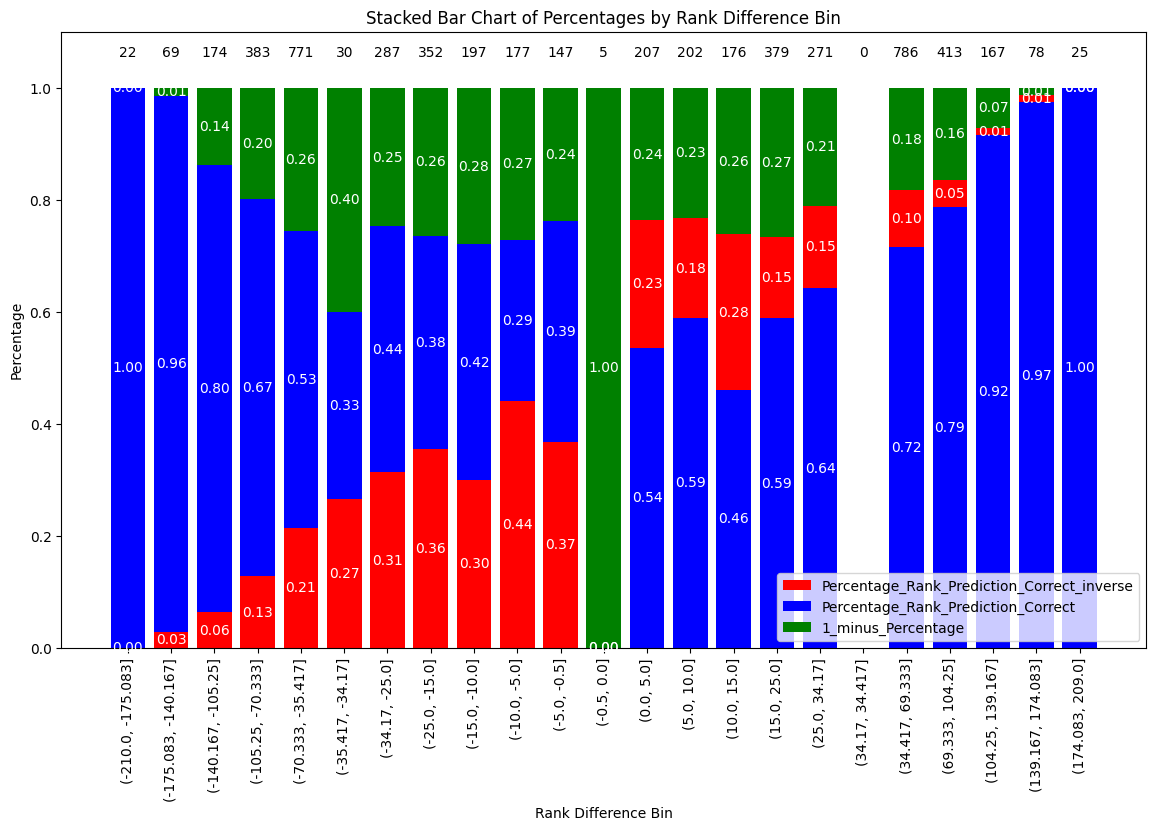

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentages
bin_summary['Percentage_Rank_Prediction_Correct'] = bin_summary['Sum_Rank_Prediction_Correct'] / bin_summary['Number_of_Rows']
bin_summary['Percentage_Rank_Prediction_Correct_inverse'] = bin_summary['Sum_Rank_Prediction_Correct_inverse'] / bin_summary['Number_of_Rows']

# Calculate 1 minus both percentages and combine into a single column
bin_summary['1_minus_Percentage'] = 1 - (bin_summary['Percentage_Rank_Prediction_Correct'] + bin_summary['Percentage_Rank_Prediction_Correct_inverse'])

# Plot the results
plt.figure(figsize=(14, 8))

# Define the positions and width for the bars
bar_width = 0.8
positions = np.arange(len(bin_summary))

# Plot the stacked bars with different orders based on the interval upper bound
for index, row in bin_summary.iterrows():
    if row['Rank_Bin'].right <= 0:
        # Order: red, blue, green
        bar1 = plt.bar(index, row['Percentage_Rank_Prediction_Correct_inverse'], bar_width, label='Percentage_Rank_Prediction_Correct_inverse' if index == 0 else "", color='r')
        bar2 = plt.bar(index, row['Percentage_Rank_Prediction_Correct'], bar_width, bottom=row['Percentage_Rank_Prediction_Correct_inverse'], label='Percentage_Rank_Prediction_Correct' if index == 0 else "", color='b')
        bar3 = plt.bar(index, row['1_minus_Percentage'], bar_width, bottom=row['Percentage_Rank_Prediction_Correct'] + row['Percentage_Rank_Prediction_Correct_inverse'], label='1_minus_Percentage' if index == 0 else "", color='g')
    else:
        # Order: blue, red, green
        bar1 = plt.bar(index, row['Percentage_Rank_Prediction_Correct'], bar_width, label='Percentage_Rank_Prediction_Correct' if index == 0 else "", color='b')
        bar2 = plt.bar(index, row['Percentage_Rank_Prediction_Correct_inverse'], bar_width, bottom=row['Percentage_Rank_Prediction_Correct'], label='Percentage_Rank_Prediction_Correct_inverse' if index == 0 else "", color='r')
        bar3 = plt.bar(index, row['1_minus_Percentage'], bar_width, bottom=row['Percentage_Rank_Prediction_Correct'] + row['Percentage_Rank_Prediction_Correct_inverse'], label='1_minus_Percentage' if index == 0 else "", color='g')

# Add labels, title, and legend
plt.xlabel('Rank Difference Bin')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Percentages by Rank Difference Bin')
plt.xticks(positions, bin_summary['Rank_Bin'].astype(str), rotation=90)
plt.legend(loc='lower right')

# Increase whitespace at the top
plt.ylim(0, 1.1)

# Annotate the bars with the number of rows and percentages
for index, row in bin_summary.iterrows():
    plt.text(index, 1.05, f'{int(row["Number_of_Rows"])}', ha='center', va='bottom')
    if row['Rank_Bin'].right <= 0:
        plt.text(index, row['Percentage_Rank_Prediction_Correct_inverse'] / 2, f'{row["Percentage_Rank_Prediction_Correct_inverse"]:.2f}', ha='center', va='center', color='white')
        plt.text(index, row['Percentage_Rank_Prediction_Correct_inverse'] + row['Percentage_Rank_Prediction_Correct'] / 2, f'{row["Percentage_Rank_Prediction_Correct"]:.2f}', ha='center', va='center', color='white')
        plt.text(index, row['Percentage_Rank_Prediction_Correct_inverse'] + row['Percentage_Rank_Prediction_Correct'] + row['1_minus_Percentage'] / 2, f'{row["1_minus_Percentage"]:.2f}', ha='center', va='center', color='white')
    else:
        plt.text(index, row['Percentage_Rank_Prediction_Correct'] / 2, f'{row["Percentage_Rank_Prediction_Correct"]:.2f}', ha='center', va='center', color='white')
        plt.text(index, row['Percentage_Rank_Prediction_Correct'] + row['Percentage_Rank_Prediction_Correct_inverse'] / 2, f'{row["Percentage_Rank_Prediction_Correct_inverse"]:.2f}', ha='center', va='center', color='white')
        plt.text(index, row['Percentage_Rank_Prediction_Correct'] + row['Percentage_Rank_Prediction_Correct_inverse'] + row['1_minus_Percentage'] / 2, f'{row["1_minus_Percentage"]:.2f}', ha='center', va='center', color='white')

plt.show()

## Task 2: win % based on # of 0-value players on the other team